In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# NYC Health Inspection Data

In [ ]:
file_path = '/content/drive/Shareddrives/CIS 550 Group Project/Datasets/DOHMH_New_York_City_Restaurant_Inspection_Results.csv'

In [ ]:
prelim_df = pd.read_csv(file_path)

In [ ]:
prelim_df.dtypes

RESTAURANT_ID              int64
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
dtype: object

In [ ]:
prelim_df.shape

(382386, 27)

In [ ]:
usage_by_col = prelim_df.memory_usage(deep=True)
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6
mbs

506.313662

In [ ]:
prelim_df.isnull().any()

RESTAURANT_ID            False
CAMIS                    False
DBA                       True
BORO                     False
BUILDING                  True
STREET                    True
ZIPCODE                   True
PHONE                     True
CUISINE DESCRIPTION       True
INSPECTION DATE          False
ACTION                    True
VIOLATION CODE            True
VIOLATION DESCRIPTION     True
CRITICAL FLAG            False
SCORE                     True
GRADE                     True
GRADE DATE                True
RECORD DATE              False
INSPECTION TYPE           True
Latitude                  True
Longitude                 True
Community Board           True
Council District          True
Census Tract              True
BIN                       True
BBL                       True
NTA                       True
dtype: bool

In [ ]:
# lots of null data; especially in the 'GRADE' attribute

missing = prelim_df.copy()
for col in missing.columns:
  missing[col] = missing[col].isnull()
missing.sum()

RESTAURANT_ID                 0
CAMIS                         0
DBA                        1089
BORO                          0
BUILDING                    840
STREET                       32
ZIPCODE                    5664
PHONE                        26
CUISINE DESCRIPTION        4523
INSPECTION DATE               0
ACTION                     4522
VIOLATION CODE             9173
VIOLATION DESCRIPTION      6740
CRITICAL FLAG                 0
SCORE                     18052
GRADE                    189399
GRADE DATE               193723
RECORD DATE                   0
INSPECTION TYPE            4522
Latitude                    388
Longitude                   388
Community Board            6760
Council District           6760
Census Tract               6760
BIN                        8552
BBL                        1128
NTA                        6760
dtype: int64

In [ ]:
missing.any(axis='columns').sum()

199495

In [ ]:
# over half of our data would be missing if we tried to get rid of the nulls
missing.any(axis=1).sum() / prelim_df.shape[0]

0.5217110459064924

In [ ]:
# to clean the data I plan to assign the grade values based on the scores, per FAQs page: https://a816-health.nyc.gov/ABCEatsRestaurants/#!/faq
# Scores 0-13: GRADE = A
# Scores 14-27: GRADE = B
# Scores 28 and above: GRADE = C 

grade_updated_df = prelim_df.copy()
grade_updated_df.loc[(grade_updated_df.SCORE <= 13) & (grade_updated_df.SCORE > 0), 'GRADE'] = 'A'
grade_updated_df.loc[(grade_updated_df.SCORE > 13) & (grade_updated_df.SCORE < 28), 'GRADE'] = 'B'
grade_updated_df.loc[(grade_updated_df.SCORE >= 28), 'GRADE'] = 'C'

In [ ]:
# less null values in 'GRADE' attribute, we can probably drop 'GRADE DATE' attribute 
missing = grade_updated_df.copy()
for col in missing.columns:
  missing[col] = missing[col].isnull()
missing.sum()

RESTAURANT_ID                 0
CAMIS                         0
DBA                        1089
BORO                          0
BUILDING                    840
STREET                       32
ZIPCODE                    5664
PHONE                        26
CUISINE DESCRIPTION        4523
INSPECTION DATE               0
ACTION                     4522
VIOLATION CODE             9173
VIOLATION DESCRIPTION      6740
CRITICAL FLAG                 0
SCORE                     18052
GRADE                     19166
GRADE DATE               193723
RECORD DATE                   0
INSPECTION TYPE            4522
Latitude                    388
Longitude                   388
Community Board            6760
Council District           6760
Census Tract               6760
BIN                        8552
BBL                        1128
NTA                        6760
dtype: int64

In [ ]:
# noticed GRADE had a value "N" but I believe it is related to null; will check once I drop all null values
# noticed there is a BORO with value 0, which I believe is related to null as well
for col in grade_updated_df.columns:
  print('Unique Values for', col)
  print(grade_updated_df[col].unique())
  print()

Unique Values for RESTAURANT_ID
[ 6931 23289 10261 ... 26363  8413  2216]

Unique Values for CAMIS
[41676437 40647906 50060771 ... 50105605 50101399 50105416]

Unique Values for DBA
['DUNKIN' 'TERRACE ON THE PARK' 'HAPPY WOK' ... 'LALIBELA ETHOPIAN REST'
 'FISH MARKET RESTAURANT ELOMDA' 'BELLA NOTTE PIZZERIA']

Unique Values for BORO
['Brooklyn' 'Queens' 'Manhattan' 'Bronx' 'Staten Island' '0']

Unique Values for BUILDING
['2168' '5211' '6619' ... '165-68' '9820' '3137']

Unique Values for STREET
['86 STREET' '111 STREET' 'BEACH CHANNEL DR' ... '87TH AVE' 'MCGRAW AVE'
 'FRANKLIN ST']

Unique Values for ZIPCODE
[11214. 11368. 11692. 11215. 11355. 11432. 11370. 10003. 11225. 10466.
 11220. 11357. 10119. 11364. 11217. 10128. 10309. 11101. 10013. 11222.
 10455. 10022. 10465. 11209. 10009. 11226. 10034. 10016. 11201. 11420.
 10028. 10012. 11238. 10451. 10018. 10460. 10459. 10002. 11206. 10027.
 11219. 11223. 11417. 10308. 11361. 10038. 10019. 10001. 11105. 10301.
 10036. 11106. 11212. 11419

In [ ]:
# tentative df we can use with attributes I found most useful, open to adding the other attributes if others feel like they have useful information

tentative_df = grade_updated_df[['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE', 'RECORD DATE', 'INSPECTION TYPE','Latitude', 'Longitude']].dropna()

In [ ]:
tentative_df['GRADE'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
tentative_df['BORO'].unique()

array(['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
missing = tentative_df.copy()
for col in missing.columns:
  missing[col] = missing[col].isnull()
missing.sum()

CAMIS                    0
DBA                      0
BORO                     0
BUILDING                 0
STREET                   0
ZIPCODE                  0
CUISINE DESCRIPTION      0
INSPECTION DATE          0
ACTION                   0
VIOLATION CODE           0
VIOLATION DESCRIPTION    0
CRITICAL FLAG            0
SCORE                    0
GRADE                    0
RECORD DATE              0
INSPECTION TYPE          0
Latitude                 0
Longitude                0
dtype: int64

In [ ]:
missing.any(axis='columns').sum()

0

In [ ]:
# much less data wasted here, so now we have a decent size dataset for use

print((missing.any(axis='columns').sum()) / missing.shape[0])

0.0


In [ ]:
# count duplicate entries; checks if all columns are the same value
tentative_df.duplicated(keep='first').value_counts()

False    333821
True      21834
dtype: int64

In [ ]:
tentative_df.shape

(355655, 18)

In [ ]:
# remove duplicate entries
tentative_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
tentative_df.shape

(333821, 18)

In [ ]:
usage_by_col = tentative_df.memory_usage(deep=True)
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6
mbs

385.476292

In [ ]:
tentative_df.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
dtype: object

In [ ]:
final_df = tentative_df
final_df.to_csv('NYC_Restaurant_Inspection_Results_Final.csv')

## Summary Statistics

In [ ]:
# Summary Statistics

for col in tentative_df.columns:
  print('\n', tentative_df[col].describe(), '\n')


 count    3.338210e+05
mean     4.638153e+07
std      4.367138e+06
min      3.007544e+07
25%      4.143105e+07
50%      5.001191e+07
75%      5.006130e+07
max      5.011517e+07
Name: CAMIS, dtype: float64 


 count     333821
unique     19639
top       DUNKIN
freq        3571
Name: DBA, dtype: object 


 count        333821
unique            5
top       Manhattan
freq         130045
Name: BORO, dtype: object 


 count     333821
unique      7125
top            1
freq        1913
Name: BUILDING, dtype: object 


 count       333821
unique        2107
top       BROADWAY
freq         12202
Name: STREET, dtype: object 


 count    333821.000000
mean      10680.069954
std         595.609031
min       10000.000000
25%       10022.000000
50%       10469.000000
75%       11229.000000
max       12345.000000
Name: ZIPCODE, dtype: float64 


 count       333821
unique          84
top       American
freq         63414
Name: CUISINE DESCRIPTION, dtype: object 


 count      333821
unique       140

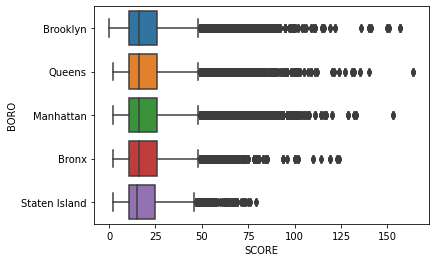

In [ ]:
sns.boxplot(x = 'SCORE', y = 'BORO', data = tentative_df)

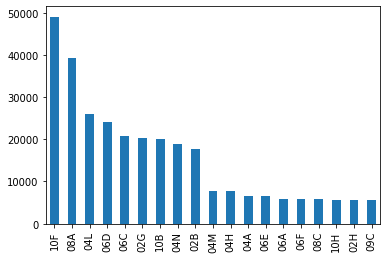

In [ ]:
tentative_df['VIOLATION CODE'].value_counts().loc[lambda x : x > 5000].plot(kind='bar')

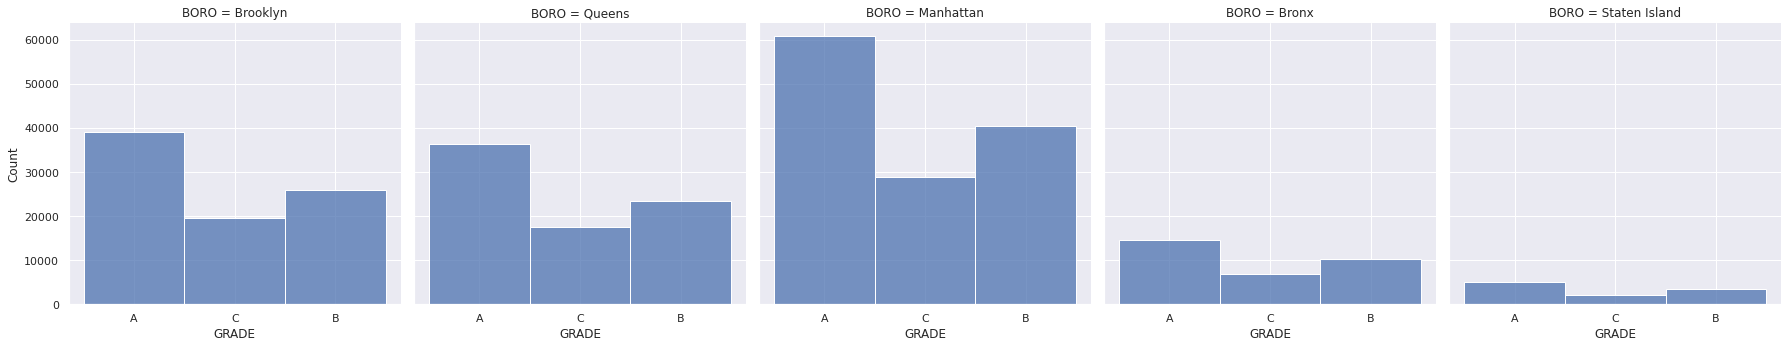

In [ ]:
sns.set_theme()
sns.displot(tentative_df, x = 'GRADE', col = 'BORO', binwidth=3, height=5, facet_kws=dict(margin_titles=True))

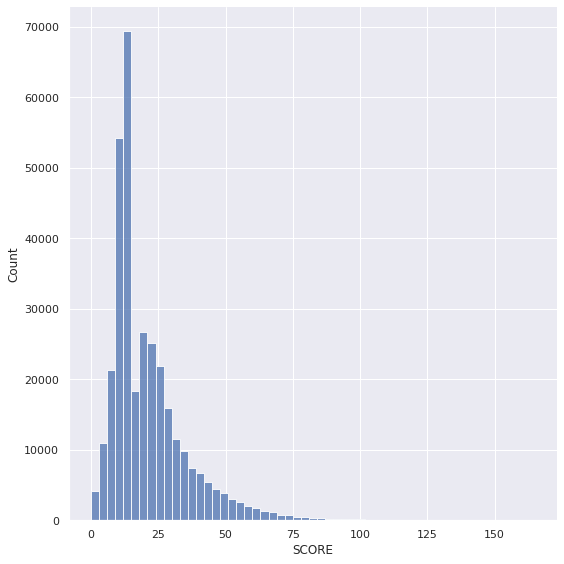

In [ ]:
sns.displot(tentative_df, x = 'SCORE', binwidth=3, height=8, facet_kws=dict(margin_titles=True))

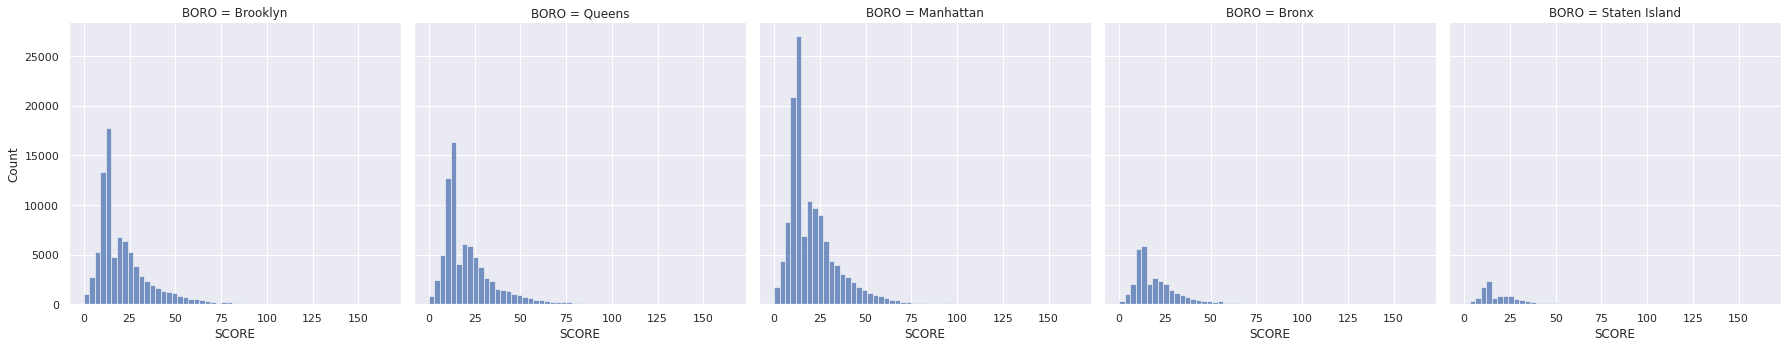

In [ ]:
sns.displot(tentative_df, x = 'SCORE', col = 'BORO', binwidth=3, height=5, facet_kws=dict(margin_titles=True))

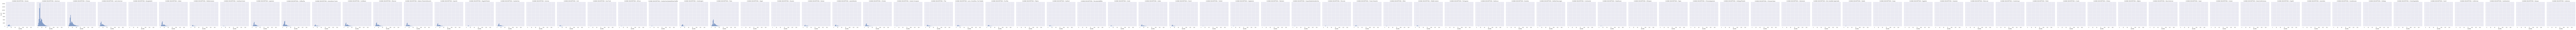

In [ ]:
sns.displot(tentative_df, x = 'SCORE', col = 'CUISINE DESCRIPTION', binwidth=3, height=5, facet_kws=dict(margin_titles=True))

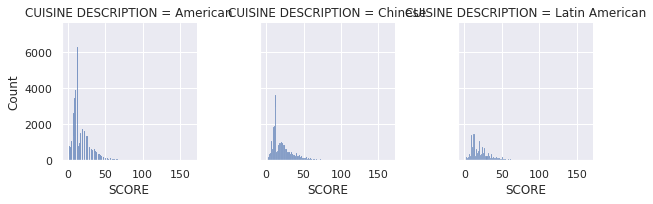

In [ ]:
g = sns.FacetGrid(tentative_df, col='CUISINE DESCRIPTION', col_order=['American', 'Chinese', 'Latin American'])
g.map_dataframe(sns.histplot, x='SCORE')